In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
df=pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [9]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [10]:
df.drop(['day', 'month', 'year'],axis=1,inplace=True)

In [11]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [14]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [13]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [18]:
#independent and dependent featurse
X=df.drop(columns=['FWI'])
y=df['FWI']

In [20]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [22]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [23]:
# feature selection based on correlation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


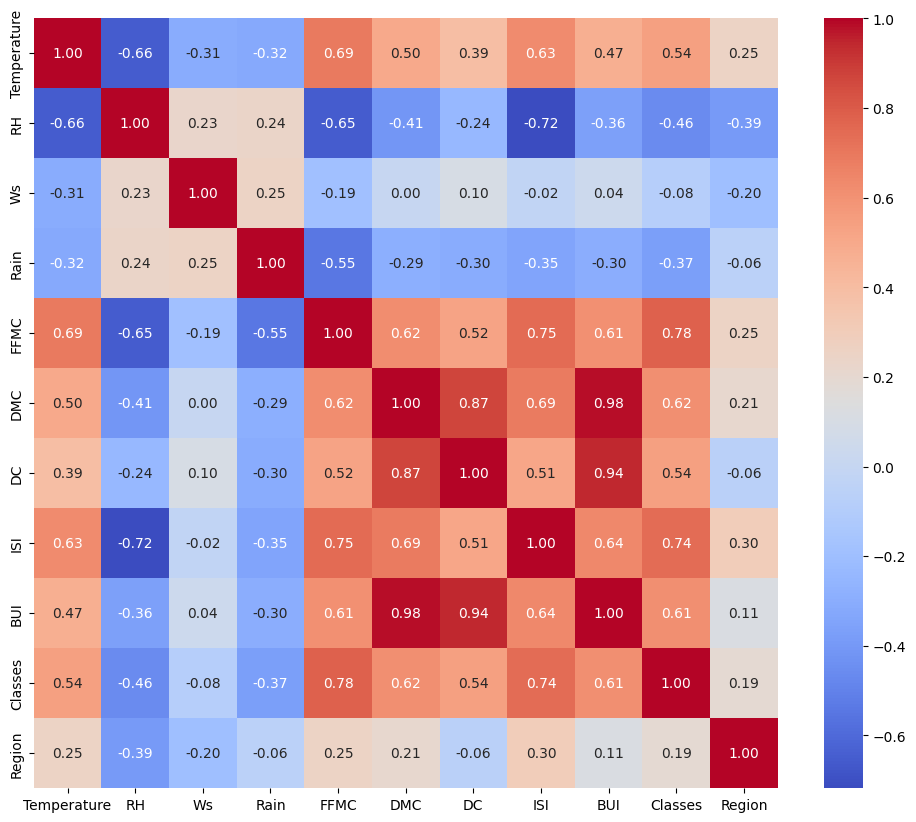

In [27]:
# check for multicollinearity
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm', fmt='.2f')
plt.show()

In [28]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [29]:
## threshold--Domain expertise
corr_features=correlation(X_train,0.95)

In [54]:
# feature scaling or standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

## Box Plots To understand Effect Of Standard Scaler

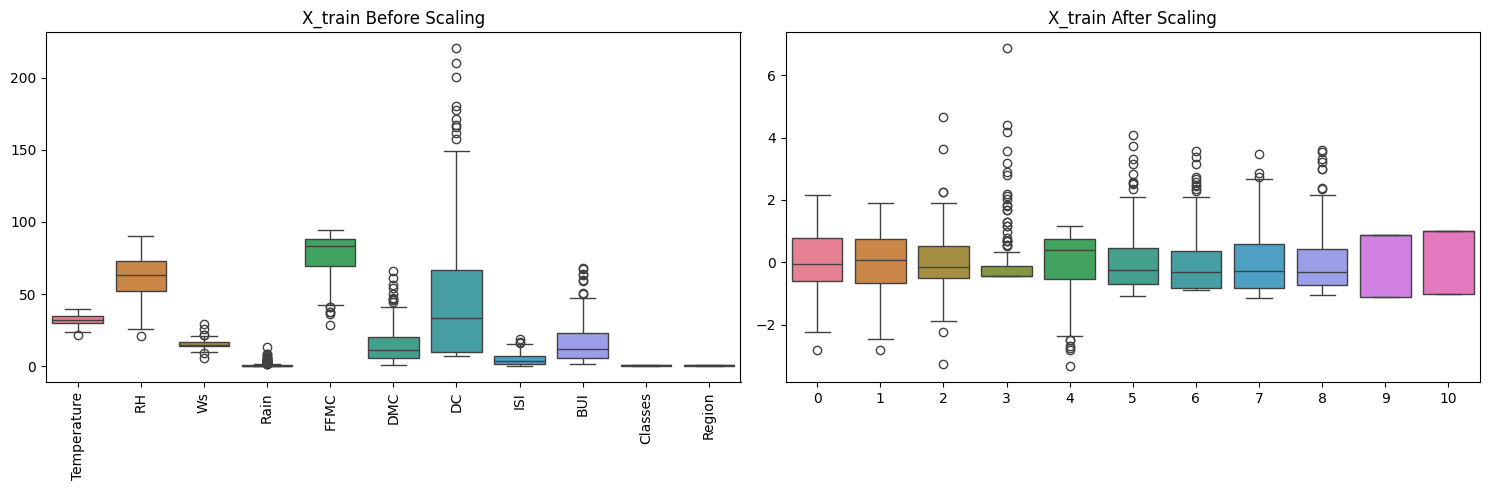

In [55]:
plt.figure(figsize=(15, 5))

# First subplot: Before scaling
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.xticks(rotation=90)  # Rotate x-axis labels to vertical

# Second subplot: After scaling
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')
  # Rotate x-axis labels to vertical

# Display the plots
plt.tight_layout()  # Optional to adjust the spacing between plots
plt.show()

## LINEAR REGRESSION MODEL

Mean absolute error 0.6793451759512593
R2 Score 0.9835073555554338


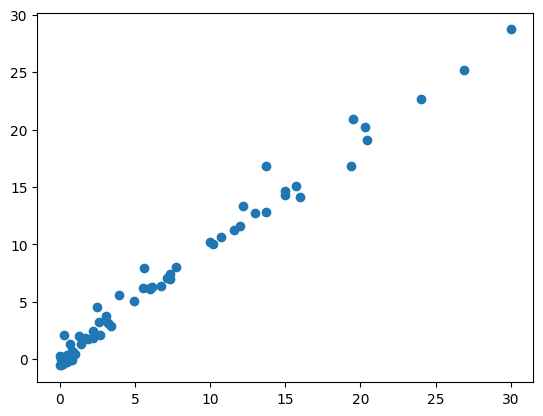

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)
plt.show()

# lasso regression 

Mean absolute error 1.232667675375393
R2 Score 0.9518928435114092


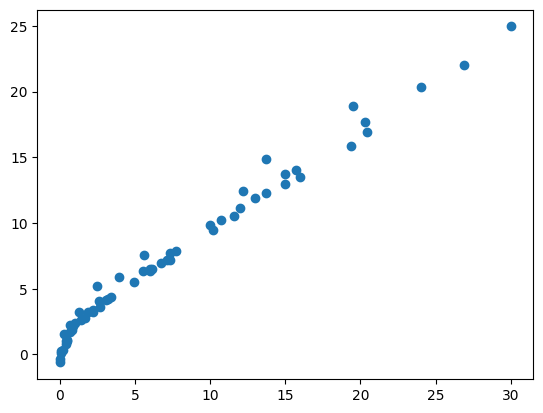

In [57]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)
plt.show()

## Ridge Regression model

Mean absolute error 0.6906032423222587
R2 Score 0.9832788903984062


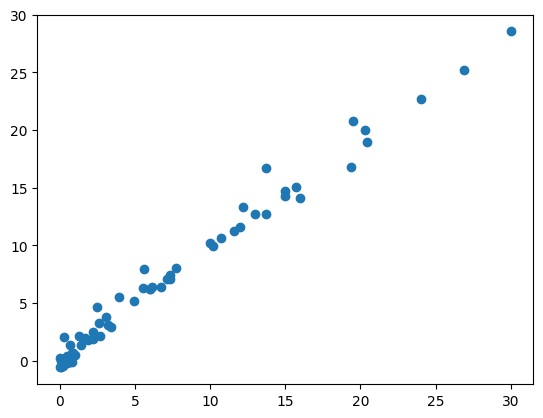

In [59]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)
plt.show()

## Elasticnet Regression

Mean absolute error 1.7241136794034395
R2 Score 0.901452690113644


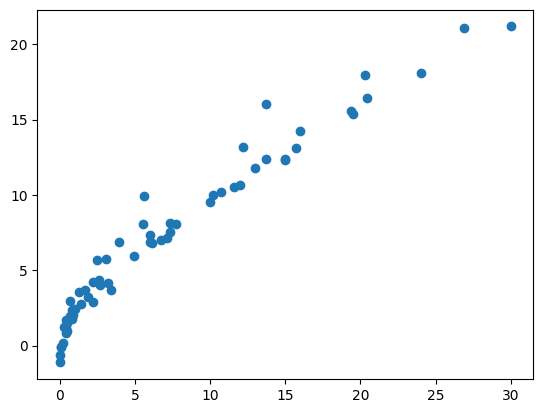

In [60]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)
plt.show()

## cross validation with lasso

In [62]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)

LassoCV(cv=5)

In [64]:
lassocv.predict(X_test_scaled)

array([ 3.24714811e+00,  1.15955915e+01,  7.06906718e+00, -4.70423571e-01,
        7.43784655e+00,  2.24604840e+00, -9.19043042e-03,  1.67301512e+01,
        6.27255381e+00,  1.50851738e+01,  1.93572605e-01,  5.10408821e+00,
        1.78416124e+00,  2.86367967e+01,  4.61006041e+00,  6.17538950e+00,
        2.47758906e+00,  1.67637808e-01,  1.33121550e+00,  2.27299284e+01,
        2.01445537e+01,  7.08999441e-01,  3.68350208e+00, -7.40649875e-02,
        1.88374982e+00,  7.08947016e-01,  1.12644785e+01,  1.42745478e+01,
        1.70121048e+01,  2.04391075e+00,  1.93542221e+00,  7.08343826e+00,
       -1.97512832e-01, -1.44090642e-01,  2.14248450e-01,  2.09335998e+01,
        1.90594400e+01,  3.02044727e+00,  7.83978012e+00,  1.01829346e+01,
        2.51516378e+01,  1.31543935e+00,  3.55750854e-01,  9.99625660e+00,
        6.12623839e+00,  1.33117254e+01,  1.06092008e+01,  1.26907297e+01,
       -4.21192267e-01, -6.02314526e-01,  5.57490327e+00,  5.53609285e-01,
        1.28546852e+01,  

In [65]:
lassocv.alpha_

np.float64(0.006792851274847154)

In [66]:
lassocv.mse_path_

array([[ 28.12356158, 107.47280586,  29.53059213,  66.72524702,
         43.65048862],
       [ 24.70602185, 107.47280586,  25.46291826,  61.53427859,
         38.00213126],
       [ 21.73055371, 107.47280586,  21.99560145,  56.05181478,
         33.00974689],
       [ 19.13974439, 104.36048956,  19.04566763,  51.2032413 ,
         28.67925168],
       [ 16.8837463 ,  95.13655566,  16.54131779,  46.91139892,
         24.92366417],
       [ 14.91905327,  86.96850608,  14.42036025,  43.10881417,
         21.66736075],
       [ 13.20792843,  79.7286199 ,  12.62901568,  39.03918052,
         18.8446162 ],
       [ 11.71750168,  73.30515088,  11.12075564,  34.35705044,
         16.3983467 ],
       [ 10.41923796,  67.60029128,   9.85531859,  30.27118721,
         14.27891082],
       [  9.28812046,  62.14349123,   8.79800948,  26.70502332,
         12.4431852 ],
       [  8.30256545,  55.22082734,   7.91877868,  23.59164333,
         10.83759354],
       [  7.44373239,  49.14387193,   7.191

Mean absolute error 0.6616028883189075
R2 Score 0.98425204176246


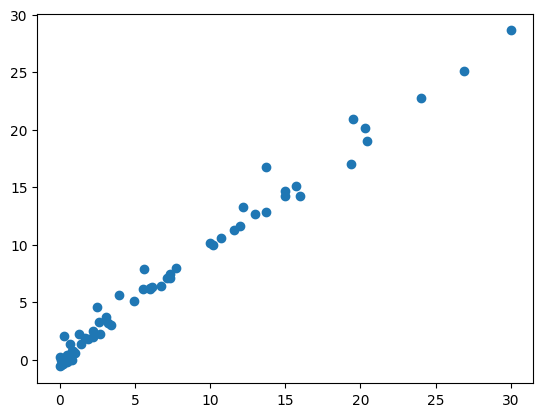

In [68]:
y_pred=lassocv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.show()

## cross validation with ridge regression

Mean absolute error 0.811043972023575
R2 Score 0.9774331105468412


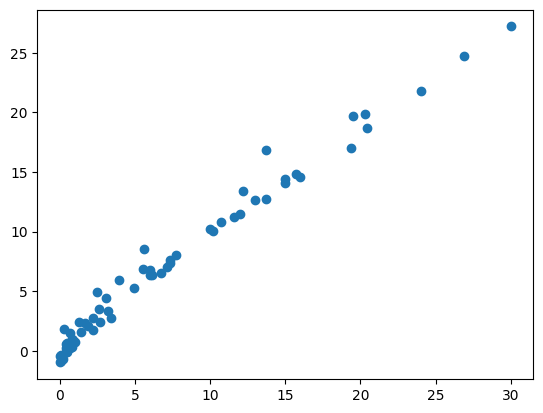

In [83]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_pred=ridgecv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.show()

In [84]:
ridgecv.alphas

(0.1, 1.0, 10.0)

In [85]:
ridgecv.cv_values_

C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\deprecation.py:102: FutureWarning: Attribute `cv_values_` is deprecated in version 1.5 and will be removed in 1.7. Use `cv_results_` instead.
  warnings.warn(msg, category=FutureWarning)


AttributeError: 'RidgeCV' object has no attribute 'cv_results_'

In [89]:
ridgecv.best_score_

np.float64(0.9404200824195492)

Mean absolute error 0.676308896967442
R2 Score 0.9837511722210888


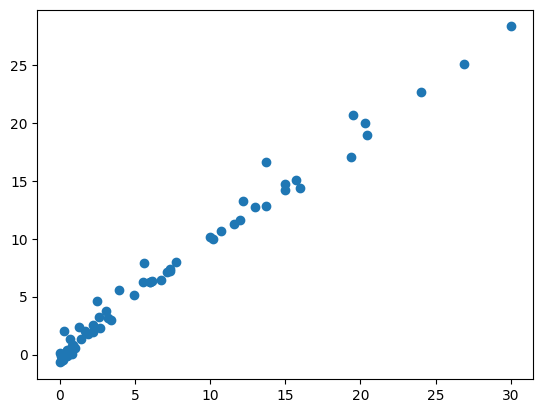

In [90]:
from sklearn.linear_model import ElasticNetCV
elasticcv=ElasticNetCV(cv=5)
elasticcv.fit(X_train_scaled,y_train)
y_pred=elasticcv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)